{1: {2: '3'}}
{2: '3'}
False
{1: {2: '3'}, 2: {4: '5'}}
{1: {2: '3', 6: '7'}, 2: {4: '5'}}


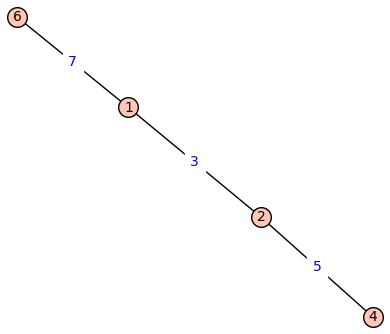

In [1]:
## load("quivers.sage")

E = {1 : {2: "3"}}
print(E)
print(E.get(1, False))
print(E.get(2, False))
E[2] = {4: "5"}
print(E)
E[1].update({6:"7"})
print(E)
G = Graph(E, weighted=True)
G.show(edge_labels=True)



In [2]:
load("quivers.sage")
Q = Quiver(matrix(([0,2,-3],[-2,0,3],[3,-3,0])))
w = [2,1,2,3,2,1,3,2,1,2,3]
m = len(w)
v = w[::-1]
print(Q)
Q = Q.mutate(w)
P = Quiver() # Should be the default quiver on one vertex
T = Q.abundantTriangularExtension(P)
for i in [1..len(u)]:
    print("-----------------")
    u = v[:i]
    print(u)
    R = T.mutate(u)
    print(R)
print(T)
T.show()

G = T.forklessPart(8)

G.show(edge_labels=True, vertex_labels=False) # Draws the labelled forkless mutation graph for our quiver 
count = 0
for P in G.vertices(sort = False):
    if P.hasSources or P.hasSinks:
        count += 1
        
    for v in P.vertices:
        R = P.subquiverRemoveVertex(v)
        if not R.isFork and not R.isAbundantAcyclic and R != Q and R != Q.oppositeQuiver():
            print("The following quiver is interesting: ")
            P.show()
            print(P)
            print(R)
            break
            
        
print("Number of non-forks, ", G.order())
print("Number of non-forks with sinks/sources, ", count)


[ 0  2 -3]
[-2  0  3]
[ 3 -3  0]


NameError: name 'u' is not defined

In [1]:

load("quivers.sage")
M = matrix(([0,2,2],[-2,0,2],[-2,-2,0]))
n = 3
w = [2,1,3]
u = [2,3]
v = w[::-1] + [1,2,3] + w
s = u[::-1] + [1,2,3] + u
s = [i + n for i in s]
Q = Quiver(M)
A = Q.mutate(w)
B = Q.mutate(u)
A.show()
B.show()
T = A.abundantTriangularExtension(B)
TPrime = T.mutate(v)
TTilde = T.mutate(v+s)
print(v+s)
T.show()
TPrime.show()
TTilde.show()
print(T == TTilde)

In [0]:
load("quivers.sage")
M = matrix(([0,3,4],[-3,0,5],[-4,-5,0]))
Q = Quiver(M)
P = Q.isomorphicQuiver([1,3,2])
print(Q)
print("-" * 20)
print(P)

[ 0  3  4]
[-3  0  5]
[-4 -5  0]
--------------------
[ 0  4  3]
[-4  0 -5]
[-3  5  0]


2 mutations deep
3 mutations deep


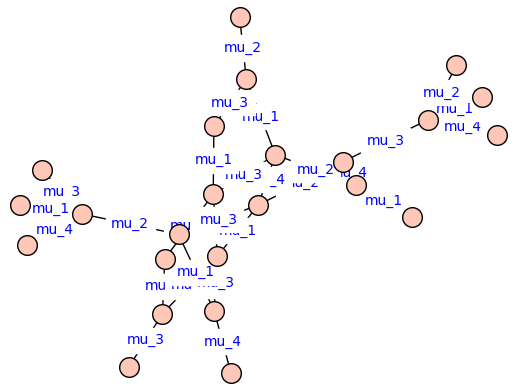

In [0]:
load("quivers.sage")
M = matrix(([0,2,0,2],[-2,0,2,0],[0,-2,0,2],[-2,0,-2,0]))
Q = Quiver(M)
G = Q.forklessPart(3)
G.plot(edge_labels = True, vertex_labels = False) # Draws the labelled forkless mutation graph for our quiver 


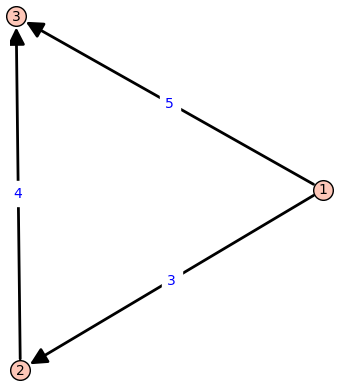

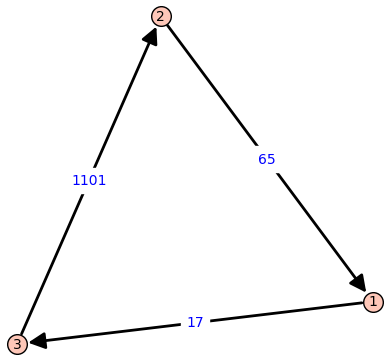

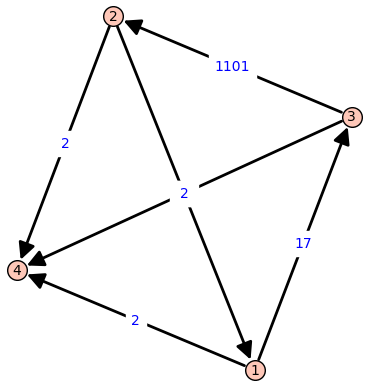

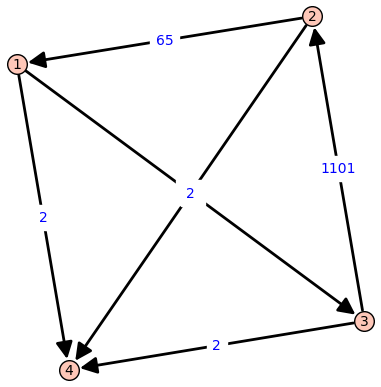

In [0]:
load("quivers.sage")
M = matrix(([0,3,5],[-3,0,4],[-5,-4,0]))
Qprime = Quiver(M)
w = [2,3,1]
wInverse = [1,3,2]
Q = Qprime.mutate(w)
displayQuiver(Qprime.matrix)
displayQuiver(Q.matrix)

P = Quiver(matrix(([0,-65,17,2],[65,0,-1101,2],[-17,1101,0,2],[-2,-2,-2,0])))
displayQuiver(P.matrix)


P1 = P.mutate(wInverse)
P2 = P1.mutate([1,2,3])
P3 = P2.mutate(w)
P4 = P3.mutate([4])

displayQuiver(P4.matrix)

## I thought I had a counter example but I did not as I had it as a source not a sink. Somehow it ruins it if source, I wonder why
## now have example of prop 3.8

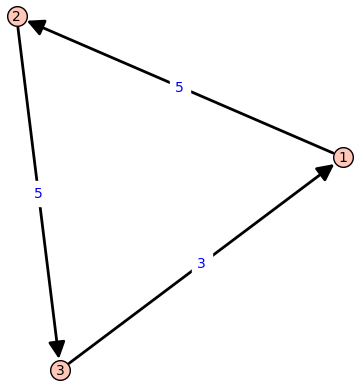

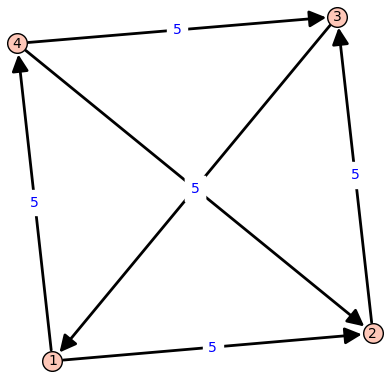

True
0
Qprime only nonfork
0
Qdprime only nonfork
0
Qdprime only nonfork


In [0]:
## playing with ideas of a construction process for quivers with 1 forkless part
load("quivers.sage")

#Q is a 3 node quiver me to 1 non fork, as defined in lem 3.6 s.t. any mutation on Q leads to a fork
# works well when m > 2 as all mutations are forks. Should still work for m = 2 as forks should be isomorphic to Q
n = 5
m = 4
Q = Quiver(matrix(([0,n,-1*m],[-1*n,0,n],[m,-1*n,0])))
displayQuiver(Q.matrix)
print() # just to seperate quiver images

# attach a node l s.t. Qprime's 3 node subquivers are of same form as one of the 3 node 1 forkless part, with m and n as defined in original 3 fork
Qprime = Quiver(matrix(([0,n,-1*m,n],
                        [-1*n,0,n,-1*n],
                        [m,-1*n,0,-1*n],
                        [-1*n,n,n,0])))
displayQuiver(Qprime.matrix)
print(Qprime.matrix == constructionOf1ForklessPart(Q.matrix, n))

print(isFork(Qprime.matrix)) ## still non fork, as expected

nonforks = []
for i in range(1,5):
    if not isFork(Qprime.mutate([i]).matrix):
        nonforks.append([Qprime.mutate([i]).matrix,i])

if len(nonforks) == 0:
    print("Qprime only nonfork")

for i in nonforks:
    print("Mutation at ", i[1], ":")
    print(i[0])

if(len(nonforks) == 2):
    isoQ = swapNodes(nonforks[0][0], nonforks[0][1], nonforks[1][1])
    print("Equal Quivers:", isoQ == Qprime.matrix)
    
# works for 3 to 4 node, try 4 to 5
Qdprime = Quiver(matrix(([0,n,-1*m,n,n],
                         [-1*n,0,n,-1*n,n],
                         [m,-1*n,0,-1*n,-1*n],
                         [-1*n,n,n,0,n],
                         [-1*n,-1*n,n,-1*n,0])))
print(isFork(Qdprime.matrix))

nonforks = []
for i in range(1,6):
    if not isFork(Qdprime.mutate([i]).matrix):
        nonforks.append([Qdprime.mutate([i]).matrix,i])

if len(nonforks) == 0:
    print("Qdprime only nonfork")

for i in nonforks:
    print("Mutation at ", i[1], ":")
    print(i[0])
    
if(len(nonforks) == 2):
    isoQ = swapNodes(nonforks[0][0], nonforks[0][1], nonforks[1][1])
    print("Equal Quivers:", isoQ == Qdprime.matrix)
    
# trying for 5 to 6, if works assumed general n -> n+1
Qtprime = Quiver(matrix(([0,n,-1*m,n,n,n],
                         [-1*n,0,n,-1*n,n,-1*n],
                         [m,-1*n,0,-1*n,-1*n,-1*n],
                         [-1*n,n,n,0,n,-1*n],
                         [-1*n,-1*n,n,-1*n,0,-1*n],
                         [-1*n,n,n,n,n,0])))
# displayQuiver(Qtprime.matrix) # looks bad so I removed the line
print(isFork(Qtprime.matrix))

nonforks = []
for i in range(1,6):
    if not isFork(Qtprime.mutate([i]).matrix):
        nonforks.append([Qtprime.mutate([i]).matrix,i])

if len(nonforks) == 0:
    print("Qdprime only nonfork")

for i in nonforks:
    print("Mutation at ", i[1], ":")
    print(i[0])
    
if(len(nonforks) == 2):
    isoQ = swapNodes(nonforks[0][0], nonforks[0][1], nonforks[1][1])
    print("Equal Quivers:", isoQ == Qtprime.matrix)


In [0]:
## generalization for the above construction process
load("quivers.sage")

## max nodes + 3 at end
maxNodes = 20

## n and m as defined above
n = 3
m = 2
Q = Quiver(matrix(([0,n,-1*m],[-1*n,0,n],[m,-1*n,0])))
Qprime = Quiver(constructionOf1ForklessPart(Q.matrix, n))

for meaningless in range(maxNodes):
    ## count number of nonforks (should be 0 when m>2 and 2 when m=2)
    print(isFork(Qprime.matrix))
    nonforks = []
    for i in range(1,Qprime.matrix.ncols()):
        if not isFork(Qprime.mutate([i]).matrix):
            nonforks.append([Qprime.mutate([i]).matrix,i])
    
    # test number of non forks
    if(len(nonforks) == 2):
        # when m=2 and thus mu1 and mu2 (i and k) must be isomorphic
        isoQ = swapNodes(nonforks[0][0], nonforks[0][1], nonforks[1][1])
        print("Equal Quivers:", isoQ == Qprime.matrix)
    else:
        # when m>2 and thus all mutations should be forks
        print(len(nonforks) == 0)
    
    # getting the next quiver w/ the construction process
    Qprime = Quiver(constructionOf1ForklessPart(Qprime.matrix, n))

0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0
True
0


True
0
True
0
True
0


True
0
True
0


True
0


True
0


True
0


True
0


True
0


True


In [0]:
load("quivers.sage")

n = 2
maxNodes = 20

Q = Quiver(matrix((
    [ 0, n,n],
    [-n, 0,n],
    [-n,-n,0]
    )))

Qprime = Quiver(Q.matrix)

for i in [1..maxNodes]:
    Qprime = Quiver(constructionOf1ForklessPart2(Qprime.matrix, n))
    for j in [2..Qprime.matrix.ncols() - 1]:
        if not(isFork(Qprime.mutate([j]).matrix)):
               print("You're wrong Ty")
    Qmu1 = Qprime.mutate([1]).matrix
    QmuN = Qprime.mutate([Qprime.matrix.ncols()]).matrix
    
    for j in [1..Qprime.matrix.ncols() - 1]:
        Qmu1 = swapNodes(Qmu1, j, j+1)
    for j in range(Qprime.matrix.ncols() - 1,0,-1):
        QmuN = swapNodes(QmuN, j, j+1)
        
    print(i + 3, Qprime.matrix == Qmu1, Qprime.matrix == QmuN)

4 True True
5 True True
6 True True
7 True True
8 True True


9 True True
10 True True
11 True True


12 True True
13 True True
14 True True


15 True True
16 True True


17 True True


18 True True


19 True True


20 True True


21 True True


22 True True


23 True True


0


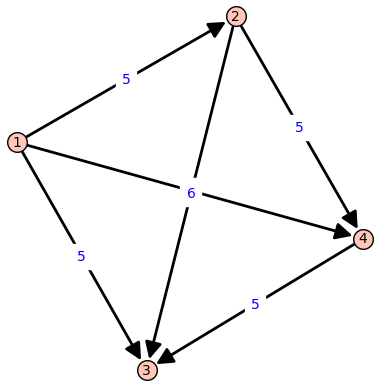

1
3
True
True


In [0]:
## issue, when looking if all forks with 1 forkless part were in my form, I found this, a 1 forkless part quiver not akin to the ones I have generated

## shows that fundementa idea of having all subquivers of 3 nodes be n-forkless part falls apart besides for 0 forkless,
## looking into construction process for these, I think it can be a generalization of 
load("quivers.sage")

n=5
m=6

Q = Quiver(matrix(([0,n,n,m],
                  [-n,0,m,n],
                  [-n,-m,0,-n],
                  [-m,-n,n,0])))


print(isFork(Q.matrix))
displayQuiver(Q.matrix)

for i in [1..4]:
    if not(isFork(Q.mutate([i]).matrix)):
        print(i)

Qmu1 = Q.mutate([1]).matrix
Qmu1 = swapNodes(Qmu1, 1,2)
Qmu1 = swapNodes(Qmu1, 2,4)
Qmu1 = swapNodes(Qmu1, 3,4)
print(Qmu1 == Q.matrix)


Qmu3 = Q.mutate([3]).matrix
Qmu3 = swapNodes(Qmu3, 1,3)
Qmu3 = swapNodes(Qmu3, 2,3)
Qmu3 = swapNodes(Qmu3, 3,4)
print(Qmu3 == Q.matrix)


[ 0 -4 -5 -5 -5 -5]
[ 4  0 -5  5 -5  5]
[ 5  5  0  4 -5  5]
[ 5 -5 -4  0 -5  5]
[ 5  5  5  5  0  4]
[ 5 -5 -5 -5 -4  0]
0


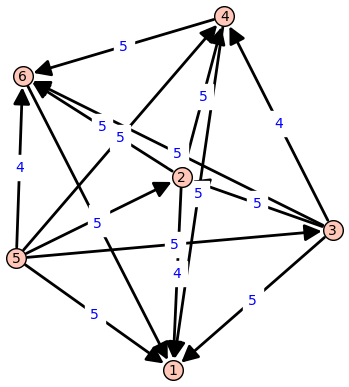

1
5
[ 0 -5 -4 -5 -5 -5]
[ 5  0 -5  5 -5  4]
[ 4  5  0  5 -5  5]
[ 5 -5 -5  0 -4  5]
[ 5  5  5  4  0  5]
[ 5 -4 -5 -5 -5  0]
False

[ 0 -4 -5 -5  5 -5]
[ 4  0 -5  5  5  5]
[ 5  5  0  4  5  5]
[ 5 -5 -4  0  5  5]
[-5 -5 -5 -5  0 -4]
[ 5 -5 -5 -5  4  0]


In [0]:
## issue: Weird thing where if you look in terms of outward and inward relations, the quivers are the same with a 
## 1-to-1 mapping of nodes but the matrix representations are fundementally different

load("quivers.sage")

n=5
m=4

Q = Quiver(matrix(([0,-m],[m,0])))
Q = constructionOf1ForklessPart3(Q.matrix, n, m)
Q = Quiver(constructionOf1ForklessPart3(Q, n, m))
print(Q.matrix)

print(isFork(Q.matrix))
displayQuiver(Q.matrix)

for i in [1..6]:
    if not(isFork(Q.mutate([i]).matrix)):
        print(i)

Qmu1 = Q.mutate([1]).matrix
Qmu1 = swapNodes(Qmu1, 1, 6)
Qmu1 = swapNodes(Qmu1, 2, 3)
Qmu1 = swapNodes(Qmu1, 3, 5)
Qmu1 = swapNodes(Qmu1, 4, 5)
Qmu1 = swapNodes(Qmu1, 5, 6)
print(Qmu1)
print(Qmu1 == Q.matrix)
print()

## definately doesnt work for mu5 as there is no node after mutation with 2 predecessors with 5 arrows
Qmu5 = Q.mutate([5]).matrix
Qmu5 = swapNodes(Qmu1, 1, 5)
Qmu5 = swapNodes(Qmu1, 1, 1)
print(Qmu5)
print(Qmu5 == Q.matrix, Qmu3 == Qmu1)


In [0]:
load("quivers.sage")
## trying to make different cyclic 1 forkless part

n = 5
m = 3
Q = Quiver(matrix(([0, n,-m,-n],
                   [-n,0, n,-m],
                   [m,-n, 0, n],
                   [n, m,-n, 0])))

print(isFork(Q.matrix))
print(isFork(Q.mutate([1]).matrix))
print(isFork(Q.mutate([2]).matrix))
print(isFork(Q.mutate([3]).matrix))
print(isFork(Q.mutate([4]).matrix))
print() ## for spacing

## trying to make even odder one
n = 5
m = 3
mp = 4
Q = Quiver(matrix(([0, n,-m, -n],
                   [-n,0, n,-mp],
                   [m,-n, 0,  n],
                   [n,mp,-n,  0])))

print(isFork(Q.matrix))
print(isFork(Q.mutate([1]).matrix))
print(isFork(Q.mutate([2]).matrix))
print(isFork(Q.mutate([3]).matrix))
print(isFork(Q.mutate([4]).matrix))
print()

## thus the construction process definately does not work to get ALL 1 forkless part quivers

## Trying one of 5 nodes
## not working like I'd want to
n = 5
m = 3
Q = Quiver(matrix(([0, n,-m,-n],
                   [-n,0, n,-m],
                   [m,-n, 0, n],
                   [n, m,-n, 0])))
Q = Quiver(constructionOf1ForklessPart(Q.matrix, n))

print(isFork(Q.matrix))
print(isFork(Q.mutate([1]).matrix))
print(isFork(Q.mutate([2]).matrix))
print(isFork(Q.mutate([3]).matrix))
print(isFork(Q.mutate([4]).matrix))
print(isFork(Q.mutate([5]).matrix))
print() ## for spacing

## attempt with 6
n = 5
m = 3
Q = Quiver(matrix(([0, n,-m,-n,n,-n],
                   [-n,0, n,-m,-n,n],
                   [m,-n, 0, n,-n,n],
                   [n, m,-n, 0,n,-n],
                   [-n,n,n,-n,0,-m],
                   [n,-n,-n,n,m,0])))

print(Q.matrix)
print(isFork(Q.matrix))
print(isFork(Q.mutate([1]).matrix))
print(isFork(Q.mutate([2]).matrix))
print(isFork(Q.mutate([3]).matrix))
print(isFork(Q.mutate([4]).matrix))
print(isFork(Q.mutate([5]).matrix))
print(isFork(Q.mutate([6]).matrix))
print() ## for spacing

## uh oh

0
1
2
3
4

0
1
2
3
4

0
1
0
3
4
0

[ 0  5 -3 -5  5 -5]
[-5  0  5 -3 -5  5]
[ 3 -5  0  5 -5  5]
[ 5  3 -5  0  5 -5]
[-5  5  5 -5  0 -3]
[ 5 -5 -5  5  3  0]
0
1
2
3
4
5
6



In [0]:
# testing construction #4
load("quivers.sage")

numNodes = 10
n = 5
m = 4

Q = Quiver(matrix(([0,-m],[m,0])))
Q = Quiver(constructionOf1ForklessPart4(Q.matrix, n, (m + 2)))

for i in [1..numNodes]:
    
    print(Q.isFork)
    
    print(i, '- 0')
    for j in [1..Q.matrix.ncols()]:
        if not(isFork(Q.mutate([j]).matrix)):
            print(j)
            
    Q = Quiver(constructionOf1ForklessPart4(Q.matrix, n, (m + 2 *((i+1)%2))))
    Qprime = Q.subquiverRemoveVertex(2*i + 4)
    
    print(i, '- 1')
    for j in [1..Qprime.matrix.ncols()]:
        if not(isFork(Qprime.mutate([j]).matrix)):
            print(j)
            
    Qprime = Q.subquiverRemoveVertex(2*i + 3)
    
    print(i, '- 2')
    for j in [1..Qprime.matrix.ncols()]:
        if not(isFork(Qprime.mutate([j]).matrix)):
            print(j)
            
    Qprime = Q.subquiverRemoveVertex(1)
    print(i, '- 3')
    for j in [1..Qprime.matrix.ncols()]:
        if not(isFork(Qprime.mutate([j]).matrix)):
            print(j)
    
    print()
    ## issue can remove any vertex and stays 1 forkless part, thus I am quite confused as where to go with this
    ## this is the 4th construction process, I conjectured infinately many, still unsure of found near all 1 forkless part quivers

False
1 - 0
1 - 1
1 - 2
1 - 3

False
2 - 0
2 - 1
2 - 2
2 - 3

False
3 - 0
3 - 1
3 - 2


3 - 3

False
4 - 0
4 - 1
4 - 2
4 - 3



False
5 - 0
5 - 1
5 - 2
5 - 3



False
6 - 0
6 - 1


6 - 2
6 - 3



False
7 - 0
7 - 1


7 - 2


7 - 3



False
8 - 0
8 - 1


8 - 2


8 - 3



False
9 - 0


9 - 1


9 - 2


9 - 3



False
10 - 0


10 - 1


10 - 2


10 - 3


In [0]:
## messing around with 2forkless part as 1 forkless part has me weared out rn
load("quivers.sage")

m = 3
n = 4
o = 5

Q = Quiver(matrix(([0,o,-n,-o],
                   [-o,0,m,n],
                   [n,-m,0,m],
                   [o,-n,-m,0])))
print(isFork(Q.matrix))

for i in [1..4]:
    Qprime = Q.mutate([i])
    if not(isFork(Qprime.matrix)):
        print(Qprime.matrix)
        
    print(i)

0
1
2
3
4
